### 데이터 불러오기

In [9]:
import pandas as pd

In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 데이터 탐색

In [14]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [15]:
print(train.columns)
print(test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


datetime : 시간당 날짜 + 타임 스탬프
season : 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울 
weather : 
     1 = 클리어, 약간 구름, 부분적으로 흐린, 부분적으로 흐린
     2 = 안개 + 흐림, 안개 + 깨진 구름, 안개 + 구름이 거의 없음, 안개
     3 = 약간의 눈, 약간의 비, 뇌우 + 맑음, 맑음 + 흩어진 구름
     4 = 폭우 + 얼음 팔레트 + 뇌우 + 미스트, 눈 + 안개 
temp : 섭씨 온도
atemp : 체감 온도
humidity : 상대 습도
windspeed : 풍속
casual : 미등록 사용자 렌탈 수
registered : 등록 된 사용자 렌탈 수 
count : 총 렌탈 수

### 데이터 시각화

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

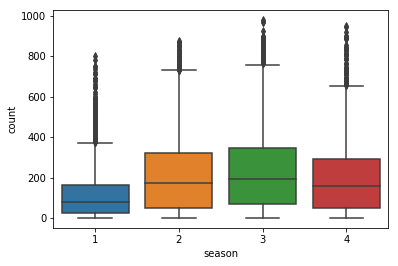

In [18]:
# 시즌별 렌탈수
sns.boxplot(x='season',y='count',data=train)

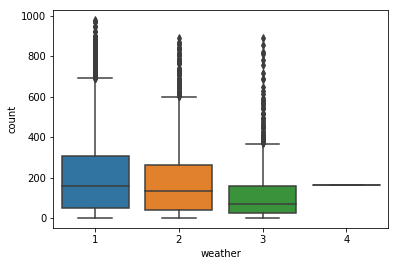

In [20]:
# 날씨별 렌탈수
sns.boxplot(x='weather',y='count',data=train)

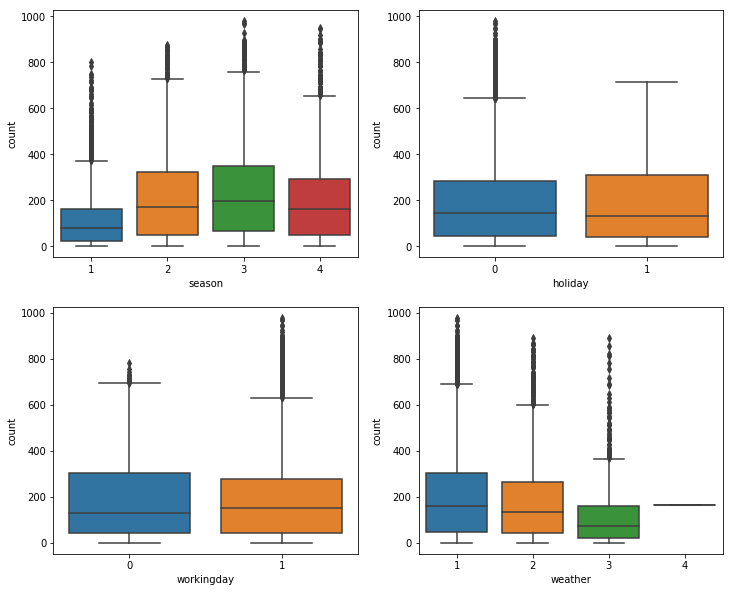

In [21]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)   # 2행2열의 첫번째 위치
sns.boxplot(x='season',y='count',data=train)
plt.subplot(2,2,2)   # 2행2열의 두번째 위치
sns.boxplot(x='holiday',y='count',data=train)
plt.subplot(2,2,3)   # 2행2열의 세번째 위치
sns.boxplot(x='workingday',y='count',data=train)
plt.subplot(2,2,4)   # 2행2열의 네번째 위치
sns.boxplot(x='weather',y='count',data=train)

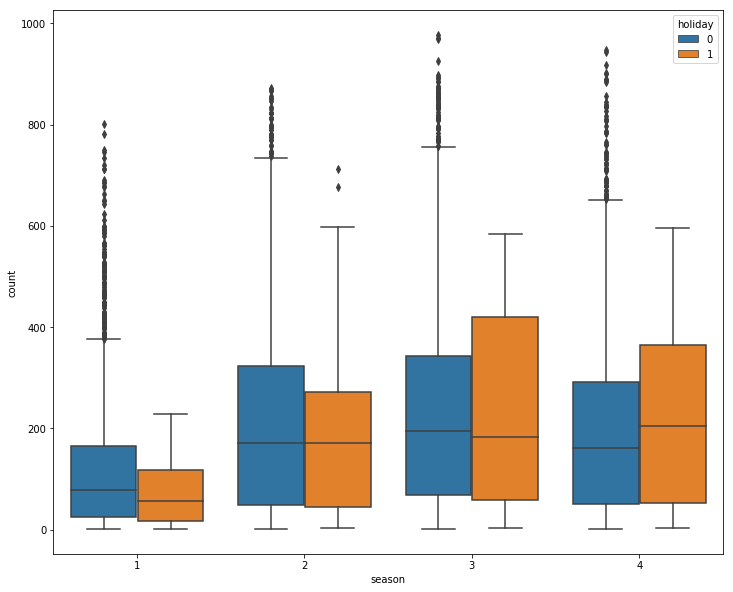

In [23]:
### boxplot 그리기 (크기 12,10) 
# x: season, y: count, 변수추가 holiday

plt.figure(figsize=(12,10))
sns.boxplot(x='season',y='count',hue='holiday',data=train)

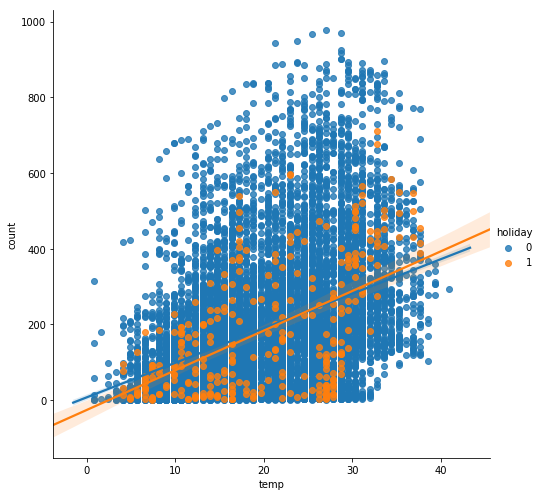

In [26]:
sns.lmplot(x='temp', y='count', hue='holiday', data=train, height=7)
# 쉬는날보다 일하는날의 렌탈수가 월등히 많다
# 온도에 따라 렌탈수가 증가하는 경향이 있다

In [29]:
tr_sub = train.copy()   # tr=train 으로 해서 쓰면 tr이 변경될 때 train도 변경됨. 원데이터에 영향을 주지 않으려면 copy()해야함

In [30]:
# feature engineering
tr_sub.loc[tr_sub['season']==1, 'season_str'] = 'spring'
tr_sub.loc[tr_sub['season']==2, 'season_str'] = 'summer'
tr_sub.loc[tr_sub['season']==3, 'season_str'] = 'fall'
tr_sub.loc[tr_sub['season']==4, 'season_str'] = 'winter'

In [32]:
tr_sub.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_str
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,spring


In [34]:
# 각각 값들의 갯수
tr_sub['season_str'].value_counts()

winter    2734
fall      2733
summer    2733
spring    2686
Name: season_str, dtype: int64

In [35]:
type(tr_sub.season)

pandas.core.series.Series

In [37]:
tr_sub.loc[:,'season':'workingday']

,season,holiday,workingday
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [38]:
tr_sub.iloc[:,1:4]

,season,holiday,workingday
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


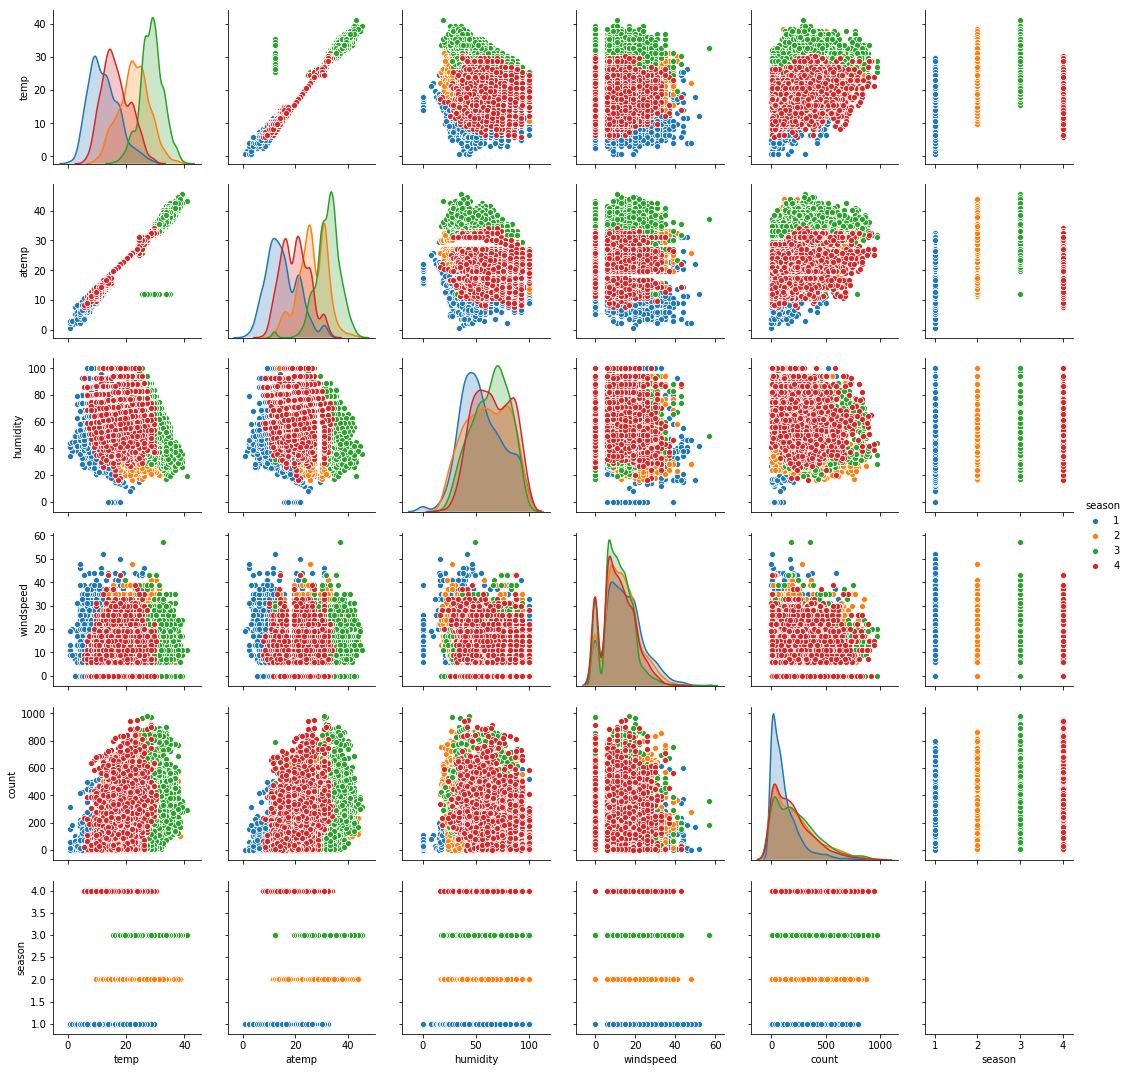

In [40]:
sel = ['temp','atemp','humidity','windspeed','count','season']
tr_sub = tr_sub[sel]
sns.pairplot(tr_sub, hue='season')

### 모델 생성

In [41]:
# 데이터 준비

f_names = ['temp','atemp']
X_train = train[f_names]     # 학습시킬 입력데이터
X_test = test[f_names]       # 예측을 수행할 입력데이터

label_name = 'count'         # 렌탈 대수
y_train = train[label_name]  # 렌탈 대수 변수 값 선택

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
# 모델선택, 학습, 예측

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [44]:
omr = pd.read_csv('sampleSubmission.csv')
omr['count'] = pred
omr.to_csv('firt_sub.csv', index=False)